In [1]:
import random

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from P11 import average_degree, simulate_sis, simulate_sir, simulate_voter_biased

## P11.1

In [2]:
def run_p11_1(
        N=500,
        p=0.02,
        beta_values=None,
        gamma=1.0,
        rho0=0.05,
        T=400,
        burn_in=200,
        n_runs=20,
        seed=123
):
    """
    Run SIS on an ER(N, p) graph for a range of beta values and compare to the mean-field epidemic threshold

    For homogeneous networks (ER), heterogeneous mean-field theory gives a threshold in terms of effective infection rate lambda = beta/gamma:
        lambda_c ~~ 1 / <k>,
    where <k> is the mean degree
    """
    if beta_values is None:
        beta_values = np.linspace(0.01, 0.6, 10)

    G = nx.erdos_renyi_graph(N, p, seed=seed)
    k_mean, k2_mean = average_degree(G)
    s_0 = 1 - rho0
    lambda_c = 1.0 / (k_mean * s_0)  # theoretical threshold: lambda = beta/gamma
    beta_c = lambda_c * gamma

    print("=== P11.1: SIS on ER graph ===")
    print(f"N = {N}, p = {p}")
    print(f"<k> ~~ {k_mean:.3f}, <k^2> ~~ {k2_mean:.3f}")
    print(f"Theoretical lambda_c ~~ 1/<k> ~~ {lambda_c:.4f} -> beta_c = lambda_c * gamma ~~ {beta_c:.4f}")
    print()

    stationary_results = []

    for beta in beta_values:
        print(f"Simulating beta = {beta:.3f}, gamma = {gamma:.3f} (lambda = {beta / gamma:.3f})...")
        ts, prev_mean, prev_std, rho_stat_mean, rho_stat_std = simulate_sis(
            G,
            beta=beta,
            gamma=gamma,
            rho0=rho0,
            T=T,
            burn_in=burn_in,
            n_runs=n_runs,
            seed=seed
        )
        stationary_results.append((beta, rho_stat_mean, rho_stat_std))

    stationary_results = np.array(stationary_results)

    # stationary prevalence vs beta
    plt.figure(figsize=(8, 6))
    plt.errorbar(
        stationary_results[:, 0],
        stationary_results[:, 1],
        yerr=stationary_results[:, 2],
        fmt='o-',
        capsize=3,
        label='simulation'
    )
    plt.axvline(beta_c, color='r', linestyle='--', label='MF threshold beta_c')
    plt.xlabel(r'$\beta$')
    plt.ylabel('Stationary prevalence rho')
    plt.title('SIS on ER graph: stationary prevalence vs beta')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "graph": G,
        "beta_values": beta_values,
        "stationary_results": stationary_results,
        "beta_c_theory": beta_c,
        "lambda_c_theory": lambda_c,
        "k_mean": k_mean,
        "k2_mean": k2_mean
    }

=== P11.1: SIS on ER graph ===
N = 500, p = 0.02
<k> ~~ 9.872, <k^2> ~~ 106.904
Theoretical lambda_c ~~ 1/<k> ~~ 0.1066 -> beta_c = lambda_c * gamma ~~ 0.1066

Simulating beta = 0.010, gamma = 1.000 (lambda = 0.010)...
Simulating beta = 0.076, gamma = 1.000 (lambda = 0.076)...
Simulating beta = 0.141, gamma = 1.000 (lambda = 0.141)...
Simulating beta = 0.207, gamma = 1.000 (lambda = 0.207)...
Simulating beta = 0.272, gamma = 1.000 (lambda = 0.272)...
Simulating beta = 0.338, gamma = 1.000 (lambda = 0.338)...
Simulating beta = 0.403, gamma = 1.000 (lambda = 0.403)...
Simulating beta = 0.469, gamma = 1.000 (lambda = 0.469)...
Simulating beta = 0.534, gamma = 1.000 (lambda = 0.534)...
Simulating beta = 0.600, gamma = 1.000 (lambda = 0.600)...


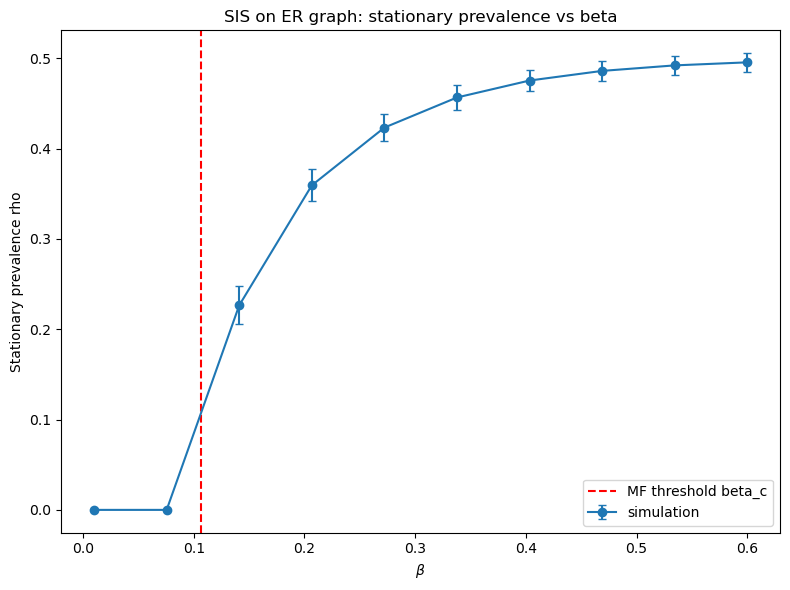

In [3]:
results_p11_1 = run_p11_1()

In [4]:
results_p11_1

{'graph': <networkx.classes.graph.Graph at 0x26d6d8b6c30>,
 'beta_values': array([0.01      , 0.07555556, 0.14111111, 0.20666667, 0.27222222,
        0.33777778, 0.40333333, 0.46888889, 0.53444444, 0.6       ]),
 'stationary_results': array([[0.01      , 0.        , 0.        ],
        [0.07555556, 0.        , 0.        ],
        [0.14111111, 0.22656219, 0.02107297],
        [0.20666667, 0.35942139, 0.01756451],
        [0.27222222, 0.42336617, 0.01468354],
        [0.33777778, 0.45671045, 0.0136694 ],
        [0.40333333, 0.4754791 , 0.01151371],
        [0.46888889, 0.48614428, 0.01088881],
        [0.53444444, 0.49224428, 0.01051713],
        [0.6       , 0.49560846, 0.01016368]]),
 'beta_c_theory': 0.10662799624669454,
 'lambda_c_theory': 0.10662799624669454,
 'k_mean': 9.872,
 'k2_mean': 106.904}

## P11.2

In [5]:
def run_p11_2(
        N=500,
        m=3,
        beta_values=None,
        gamma=1.0,
        rho0=0.05,
        T=400,
        burn_in=200,
        n_runs=20,
        seed=123
):
    """
    Run SIS on a BA scale-free.

    In heterogeneous mean-field theory, the SIS epidemic threshold is
        lambda_c = <k> / <k^2>
    """
    if beta_values is None:
        beta_values = np.linspace(0.01, 0.3, 10)

    G = nx.barabasi_albert_graph(N, m, seed=seed)
    k_mean, k2_mean = average_degree(G)

    lambda_c = k_mean / k2_mean  # heterogeneous mean-field threshold
    beta_c = lambda_c * gamma

    print("=== P11.2: SIS on BA scale-free graph ===")
    print(f"N = {N}, m = {m}")
    print(f"<k> ~~ {k_mean:.3f}, <k^2> ~~ {k2_mean:.3f}")
    print(f"Theoretical lambda_c ~~ <k>/<k^2> ~~ {lambda_c:.4f} -> beta_c ~~ {beta_c:.4f}")
    print("For large N and gamma ~~ 3, <k^2> grows with N, so lambda_c → 0 (vanishing threshold).")
    print()

    stationary_results = []

    for beta in beta_values:
        print(f"Simulating beta = {beta:.3f}, gamma = {gamma:.3f} (lambda = {beta / gamma:.3f})...")
        ts, prev_mean, prev_std, rho_stat_mean, rho_stat_std = simulate_sis(
            G,
            beta=beta,
            gamma=gamma,
            rho0=rho0,
            T=T,
            burn_in=burn_in,
            n_runs=n_runs,
            seed=seed
        )
        stationary_results.append((beta, rho_stat_mean, rho_stat_std))

    stationary_results = np.array(stationary_results)

    plt.figure(figsize=(8, 6))
    plt.errorbar(
        stationary_results[:, 0],
        stationary_results[:, 1],
        yerr=stationary_results[:, 2],
        fmt='o-',
        capsize=3,
        label='simulation'
    )
    plt.axvline(beta_c, color='r', linestyle='--', label='HMF beta_c')
    plt.xlabel(r'$\beta$')
    plt.ylabel('Stationary prevalence rho')
    plt.title('SIS on BA graph: stationary prevalence vs beta')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "graph": G,
        "beta_values": beta_values,
        "stationary_results": stationary_results,
        "beta_c_theory": beta_c,
        "lambda_c_theory": lambda_c,
        "k_mean": k_mean,
        "k2_mean": k2_mean,
    }

=== P11.2: SIS on BA scale-free graph ===
N = 500, m = 3
<k> ~~ 5.964, <k^2> ~~ 75.872
Theoretical lambda_c ~~ <k>/<k^2> ~~ 0.0786 -> beta_c ~~ 0.0786
For large N and gamma ~~ 3, <k^2> grows with N, so lambda_c → 0 (vanishing threshold).

Simulating beta = 0.010, gamma = 1.000 (lambda = 0.010)...
Simulating beta = 0.042, gamma = 1.000 (lambda = 0.042)...
Simulating beta = 0.074, gamma = 1.000 (lambda = 0.074)...
Simulating beta = 0.107, gamma = 1.000 (lambda = 0.107)...
Simulating beta = 0.139, gamma = 1.000 (lambda = 0.139)...
Simulating beta = 0.171, gamma = 1.000 (lambda = 0.171)...
Simulating beta = 0.203, gamma = 1.000 (lambda = 0.203)...
Simulating beta = 0.236, gamma = 1.000 (lambda = 0.236)...
Simulating beta = 0.268, gamma = 1.000 (lambda = 0.268)...
Simulating beta = 0.300, gamma = 1.000 (lambda = 0.300)...


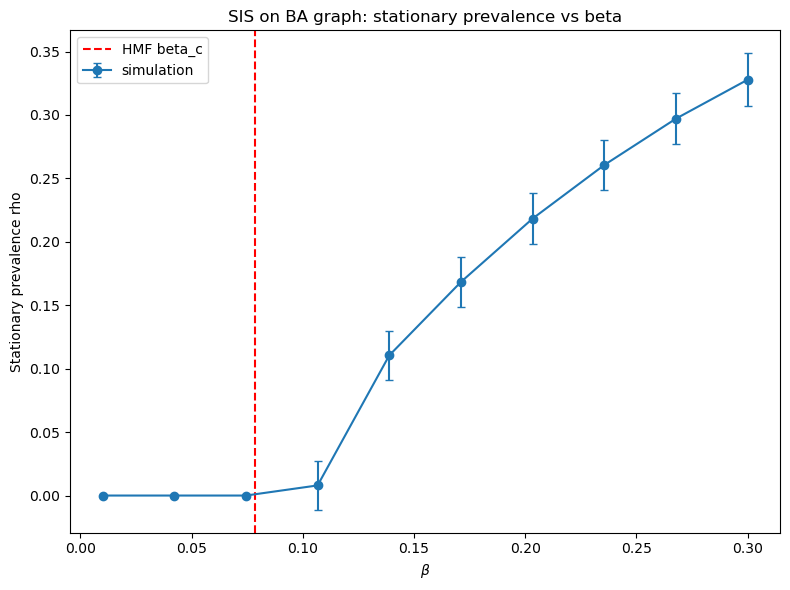

In [6]:
results_p11_2 = run_p11_2()

In [7]:
results_p11_2

{'graph': <networkx.classes.graph.Graph at 0x26d6e482540>,
 'beta_values': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
        0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
 'stationary_results': array([[0.01      , 0.        , 0.        ],
        [0.04222222, 0.        , 0.        ],
        [0.07444444, 0.        , 0.        ],
        [0.10666667, 0.0079801 , 0.01928616],
        [0.13888889, 0.11051542, 0.01935906],
        [0.17111111, 0.16839701, 0.02001501],
        [0.20333333, 0.21834478, 0.01991848],
        [0.23555556, 0.26059652, 0.02000202],
        [0.26777778, 0.29713085, 0.01990559],
        [0.3       , 0.32783383, 0.02087485]]),
 'beta_c_theory': 0.07860607338675665,
 'lambda_c_theory': 0.07860607338675665,
 'k_mean': 5.964,
 'k2_mean': 75.872}

## P11.3

In [8]:
def run_p11_3(
        N=500,
        p=0.02,
        beta=0.01,
        gamma=0.007,
        rho0=0.003,
        T=400,
        n_runs=20,
        seed=123
):
    """
    SIR model on ER graph
    R(t) saturates at the final outbreak size
    """
    G = nx.erdos_renyi_graph(N, p, seed=seed)
    k_mean, _ = average_degree(G)

    # For SIR on homogeneous networks, an epidemic occurs if
    # the basic reproduction number R0 = (beta/gamma) > 1.
    R0 = (beta / gamma)  #* k_mean

    print("=== P11.3: SIR on ER graph ===")
    print(f"N = {N}, p = {p}")
    print(f"<k> ~~ {k_mean:.3f}")
    print(f"beta = {beta:.3f}, gamma = {gamma:.3f} -> R0 ~~ {R0:.2f}")

    ts, I_mean, R_mean = simulate_sir(
        G,
        beta=beta,
        gamma=gamma,
        rho0=rho0,
        T=T,
        n_runs=n_runs,
        seed=seed
    )

    plt.figure(figsize=(8, 6))
    plt.plot(ts, 1 - I_mean - R_mean, label='S(t) (suceptible)')
    plt.plot(ts, I_mean, label='I(t) (infected)')
    plt.plot(ts, R_mean, label='R(t) (recovered)')
    plt.xlabel('t')
    plt.ylabel('Fraction of nodes')
    plt.title('SIR on ER graph')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Final outbreak size (R at t={T}) ~~ {R_mean[-1]:.3f}")

    return {
        "graph": G,
        "ts": ts,
        "I_mean": I_mean,
        "R_mean": R_mean,
        "R0": R0
    }

=== P11.3: SIR on ER graph ===
N = 500, p = 0.02
<k> ~~ 9.872
beta = 0.020, gamma = 0.007 -> R0 ~~ 2.86


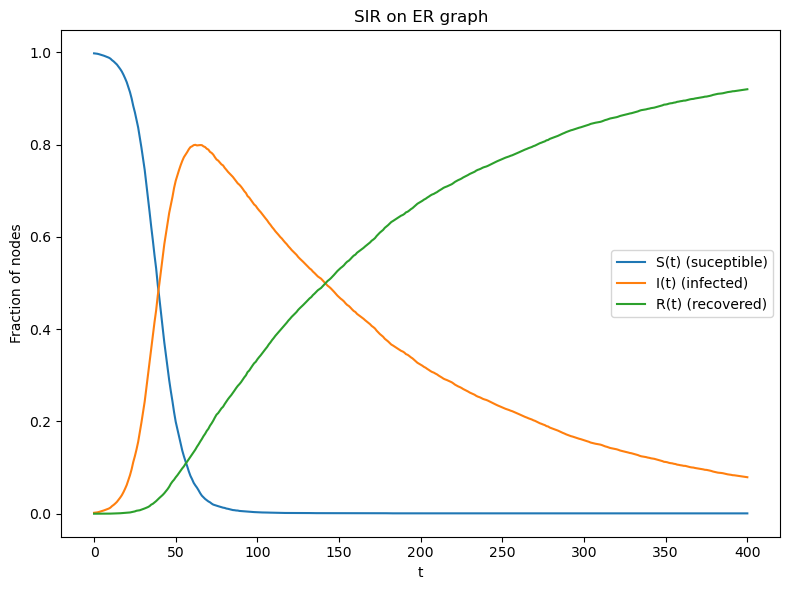

Final outbreak size (R at t=400) ~~ 0.920


In [9]:
results_p11_3 = run_p11_3(beta=0.02)

=== P11.3: SIR on ER graph ===
N = 500, p = 0.02
<k> ~~ 9.872
beta = 0.007, gamma = 0.007 -> R0 ~~ 1.00


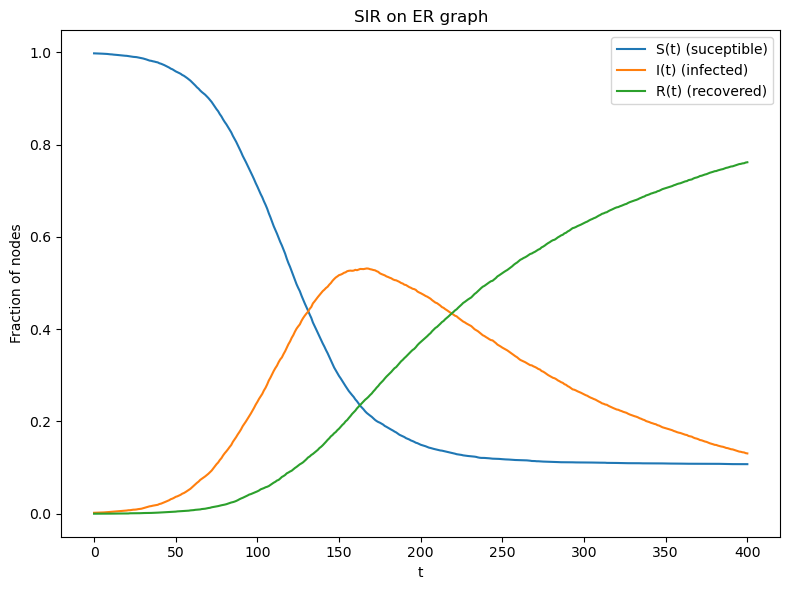

Final outbreak size (R at t=400) ~~ 0.762


In [10]:
results_p11_3 = run_p11_3(beta=0.007)

=== P11.3: SIR on ER graph ===
N = 500, p = 0.02
<k> ~~ 9.872
beta = 0.005, gamma = 0.007 -> R0 ~~ 0.71


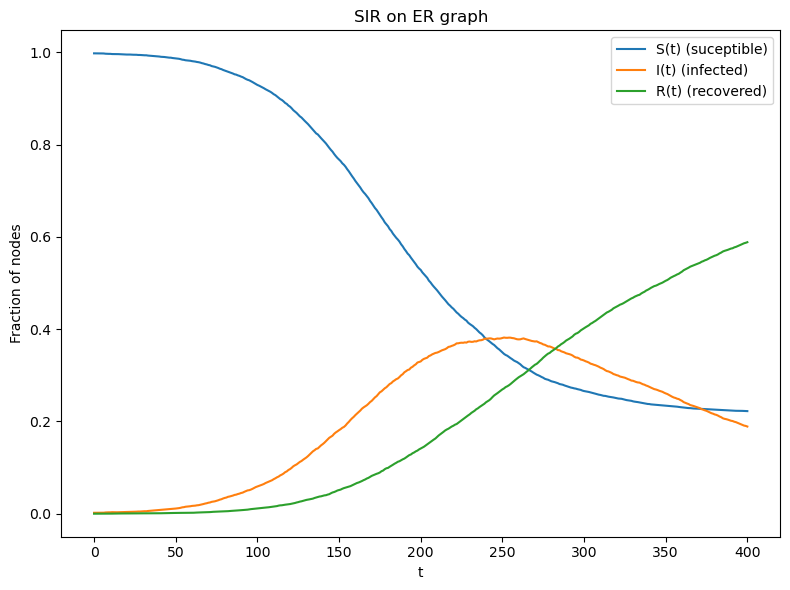

Final outbreak size (R at t=400) ~~ 0.589


In [11]:
results_p11_3 = run_p11_3(beta=0.005)

In [12]:
results_p11_3

{'graph': <networkx.classes.graph.Graph at 0x26d6db21c40>,
 'ts': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 1

## P11.4

Agnieszka Czaplicka, Christos Charalambous, Raul Toral, Maxi San Miguel,
Biased-voter model: How persuasive a small group can be?,
Chaos, Solitons & Fractals,
Volume 161,
2022,
112363,
ISSN 0960-0779,
https://doi.org/10.1016/j.chaos.2022.112363.
(https://www.sciencedirect.com/science/article/pii/S0960077922005732)
Keywords: Biased voter model; Dependent on bias complex network topologies


In [13]:
def run_p11_4(N=500,
              p=0.05,
              gamma=0.1,
              v=0.2,
              preferred_state=1,
              T=300,
              n_runs=30,
              seed=123):
    """
    Biased Voter Model with ER graph
    - A fraction gamma of voters biased towards preferred_state {1}
    - Bias strength v - how much easier preferred_state is adopted

    - Magnetization m(t) (average opinion).
    - Fraction of runs that reach consensus on preferred vs non-preferred opinion.
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    G = nx.erdos_renyi_graph(N, p, seed=seed)

    ts, m_mean, m_std, consensus_fraction = simulate_voter_biased(
        G,
        T=T,
        gamma=gamma,
        v=v,
        n_runs=n_runs,
        seed=seed
    )

    print("=== Biased voter model (Czaplicka et al. inspired) ===")
    print(f"N = {N}, p = {p}")
    print(f"gamma (fraction biased) = {gamma}")
    print(f"v (bias strength)       = {v}")
    print(f"preferred_state         = {preferred_state}\n")

    print("Consensus fractions over runs:")
    print(f"  preferred opinion   : {consensus_fraction['preferred']:.3f}")
    print(f"  non-preferred opinion: {consensus_fraction['non_preferred']:.3f}")
    print(f"  no full consensus    : {consensus_fraction['no_consensus']:.3f}")

    # mags trajectory
    plt.figure(figsize=(8, 6))
    plt.plot(ts, m_mean, label="mean magnetization m(t)")
    plt.fill_between(
        ts,
        m_mean - m_std,
        m_mean + m_std,
        alpha=0.2,
        label="±1 std"
    )
    plt.axhline(preferred_state, color='r', linestyle='--', label='preferred state')
    plt.xlabel("t (steps)")
    plt.ylabel("magnetization m(t)")
    plt.title("Biased voter model (ER graph)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "graph": G,
        "ts": ts,
        "m_mean": m_mean,
        "m_std": m_std,
        "consensus_fraction": consensus_fraction
    }

=== Biased voter model (Czaplicka et al. inspired) ===
N = 500, p = 0.05
gamma (fraction biased) = 0.2
v (bias strength)       = 0.2
preferred_state         = 1

Consensus fractions over runs:
  preferred opinion   : 1.000
  non-preferred opinion: 0.000
  no full consensus    : 0.000


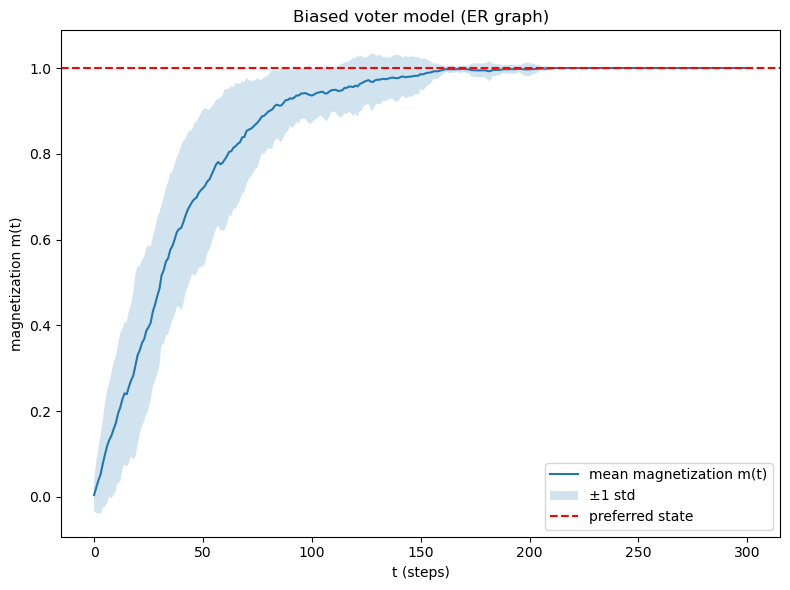

In [14]:
results_p11_4 = run_p11_4(gamma=0.2)

=== Biased voter model (Czaplicka et al. inspired) ===
N = 500, p = 0.05
gamma (fraction biased) = 0.05
v (bias strength)       = 0.2
preferred_state         = 1

Consensus fractions over runs:
  preferred opinion   : 0.600
  non-preferred opinion: 0.000
  no full consensus    : 0.400


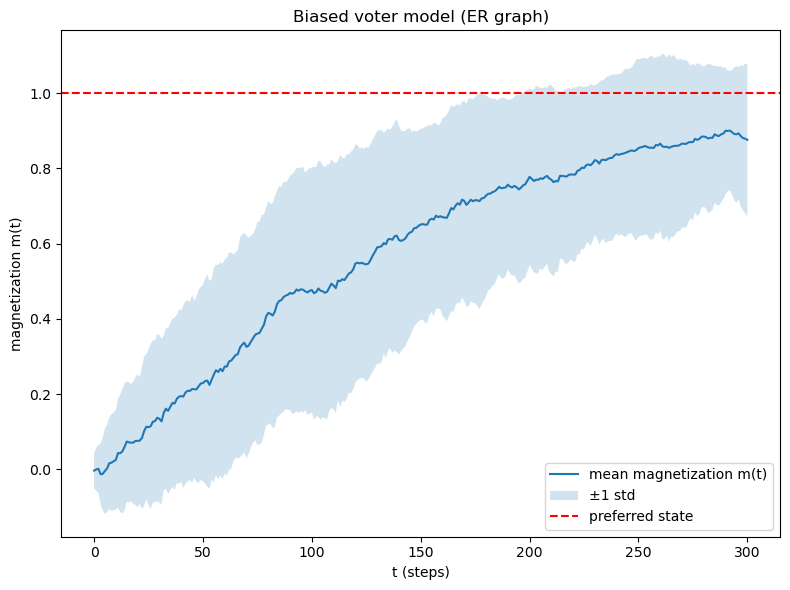

In [15]:
results_p11_4 = run_p11_4(gamma=0.05)

=== Biased voter model (Czaplicka et al. inspired) ===
N = 500, p = 0.05
gamma (fraction biased) = 0.1
v (bias strength)       = 0.2
preferred_state         = 1

Consensus fractions over runs:
  preferred opinion   : 0.867
  non-preferred opinion: 0.000
  no full consensus    : 0.133


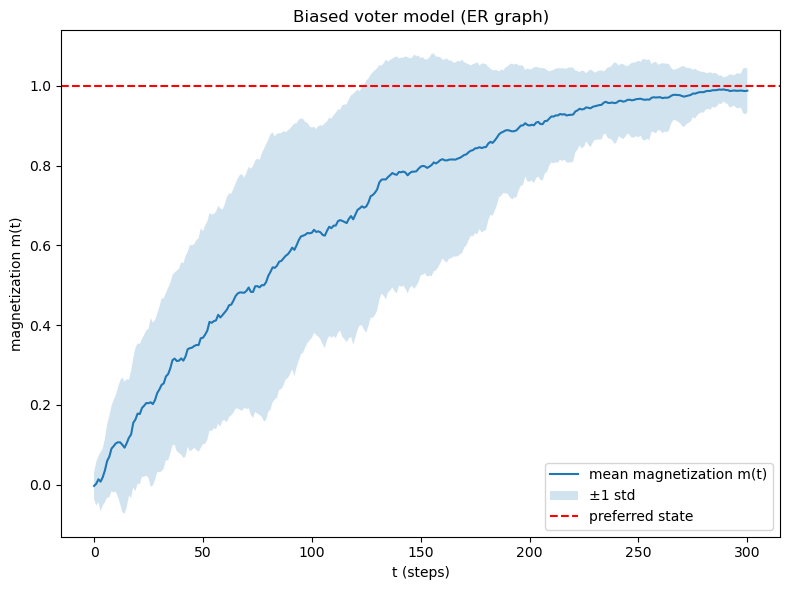

In [16]:
results_p11_4 = run_p11_4()

=== Biased voter model (Czaplicka et al. inspired) ===
N = 500, p = 0.05
gamma (fraction biased) = 0.1
v (bias strength)       = 0.05
preferred_state         = 1

Consensus fractions over runs:
  preferred opinion   : 0.400
  non-preferred opinion: 0.000
  no full consensus    : 0.600


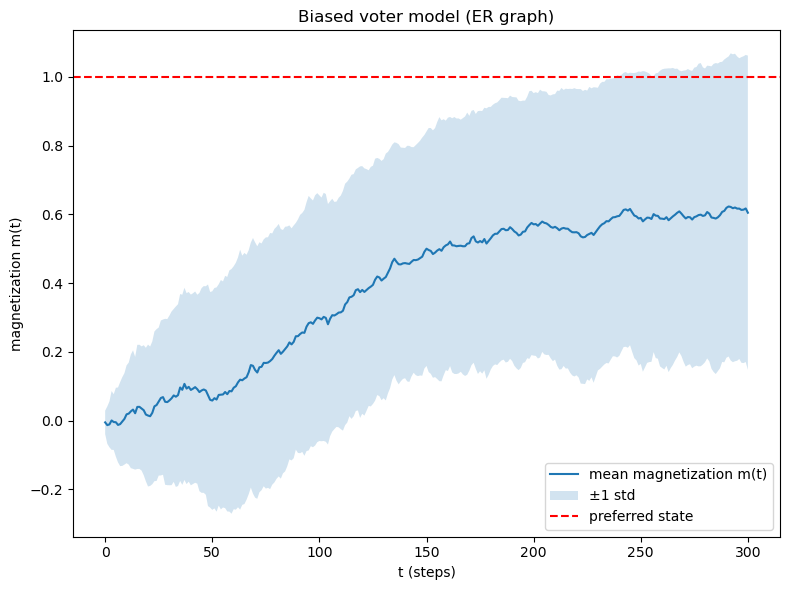

In [17]:
results_p11_4 = run_p11_4(v=0.05)

=== Biased voter model (Czaplicka et al. inspired) ===
N = 500, p = 0.05
gamma (fraction biased) = 0.1
v (bias strength)       = 0.5
preferred_state         = 1

Consensus fractions over runs:
  preferred opinion   : 1.000
  non-preferred opinion: 0.000
  no full consensus    : 0.000


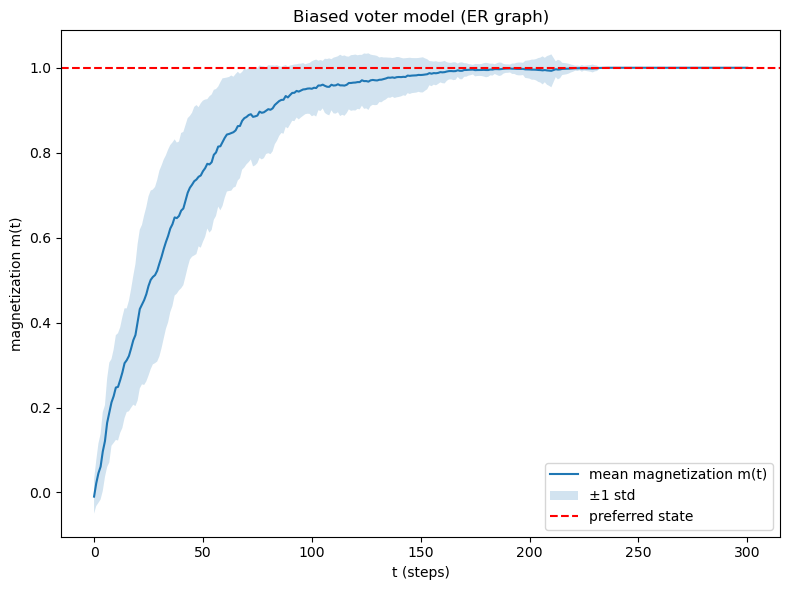

In [18]:
results_p11_4 = run_p11_4(v=0.5)

In [19]:
results_p11_4

{'graph': <networkx.classes.graph.Graph at 0x26d6ea78b60>,
 'ts': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 1